In [11]:
from qwind import wind
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_context("talk")
import pandas as pd
%matplotlib inline
from matplotlib.colors import LogNorm
from glob import glob
import os
from qwind import constants
from pyagn import sed
from scipy.optimize import curve_fit
import importlib
import plotting
importlib.reload(plotting)

<module 'plotting' from '/cosma7/data/dp004/dc-quer1/qwind/Notebooks/plotting.py'>

In [12]:
M_range = np.geomspace(1e7,1e9,11)
print(M_range)
mdot_range = np.geomspace(0.05,1,10)
mdot_range

[1.00000000e+07 1.58489319e+07 2.51188643e+07 3.98107171e+07
 6.30957344e+07 1.00000000e+08 1.58489319e+08 2.51188643e+08
 3.98107171e+08 6.30957344e+08 1.00000000e+09]


array([0.05      , 0.06974754, 0.09729439, 0.13572088, 0.18932395,
       0.2640976 , 0.36840315, 0.51390427, 0.71687116, 1.        ])

In [13]:
M = 1e9
mdot = 1
print("%e, %f " %(M,mdot))

1.000000e+09, 1.000000 


In [15]:
test = wind.Qwind(M=M, mdot = mdot, n_cpus = 1, nr = 20, eta = 0.0313, modes = ['old_integral', 'old_sed'])

r_in: 200.000000 
 r_out: 1600.000000


In [16]:
test.start_lines(niter = 50000)

Starting line iteration
Line 1 of 20


Failed wind! 

Line 2 of 20


escape velocity reached.
out of grid 

Line 3 of 20


Failed wind! 

Line 4 of 20


Failed wind! 

Line 5 of 20


Failed wind! 

Line 6 of 20


Failed wind! 

Line 7 of 20


Failed wind! 

Line 8 of 20


Failed wind! 

Line 9 of 20


Failed wind! 

Line 10 of 20


Failed wind! 

Line 11 of 20


Failed wind! 

Line 12 of 20


Failed wind! 

Line 13 of 20


Failed wind! 

Line 14 of 20


Failed wind! 

Line 15 of 20


Failed wind! 

Line 16 of 20


Failed wind! 

Line 17 of 20


Failed wind! 

Line 18 of 20


Failed wind! 

Line 19 of 20


Failed wind! 

Line 20 of 20


Failed wind! 



In [23]:
def read_qwind_file(file):
    df = pd.read_csv(file, sep = "\s+", skiprows=1,  names =['time', 'R', 'PHI', 'Z', 'Vz[km/s]', 'Ve[km/s]', 'fm', 'abs_uv', 'Vtot[km/s]', 'Tau_xt', 'xi_t', 'dv_dr[s]', 'd', 'tau_s', 'Fr_grav[cm/s^2]', 'fr_rad[cm/s^2]', 'L', 'Labs', 'iter', 'tau_eff','r_eff0','r_eff','tau_uv_t', 'Ir', 'Iz', 'tau_X'])
    return df

In [24]:
originals = glob("../../qwind_original/bin64/qw_paper/qwi*")

(0, 100)

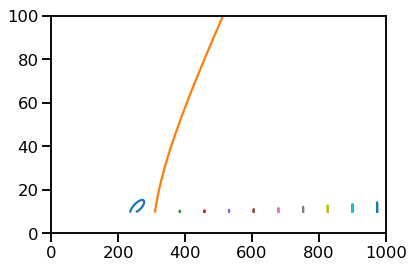

In [30]:
for line in test.lines:
    plt.plot(line.r_hist, line.z_hist)
plt.xlim(0,1000)
plt.ylim(0,100)

(0, 100)

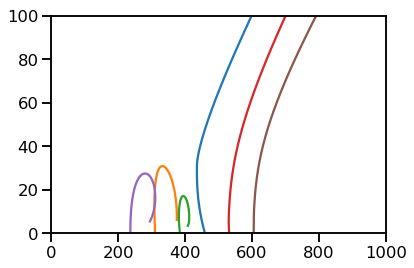

In [27]:
for file in originals:
    df = read_qwind_file(file)
    plt.plot(df.R, df.Z)
plt.xlim(0,1000)
plt.ylim(0,100)

In [29]:
originals

['../../qwind_original/bin64/qw_paper/qwind.dat04',
 '../../qwind_original/bin64/qw_paper/qwind.dat02',
 '../../qwind_original/bin64/qw_paper/qwind.dat03',
 '../../qwind_original/bin64/qw_paper/qwind.dat05',
 '../../qwind_original/bin64/qw_paper/qwind.dat01',
 '../../qwind_original/bin64/qw_paper/qwind.dat06']